# Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data/AI_ML_Intern_Task_Data.csv")
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1200, 21)


,user_id,car_type,service_type,booking_day_of_week,booking_hour,lead_time_days,previous_missed_appointments,no_show,payment_method,first_time_user,...,distance_to_station_km,preferred_time_slot,device_used,referral_source,booking_channel,service_duration_minutes,rating_previous_service,wait_time_last_booking_min,account_age_days,cancellation_count
0,user_0,sedan,brake_repair,Tuesday,13.0,14.0,1.0,1,cash,0,...,0.56,morning,tablet,friend,whatsapp,90.0,NaN,1.0,743.0,0.0
1,user_1,suv,oil_change,Sunday,7.0,25.0,0.0,0,card,yes,...,9.40,morning,NaN,instagram,mobile_app,NaN,3.8,13.0,NaN,1.0
2,user_2,truck,oil_change,Saturday,14.0,NaN,3.0,0,transfer,yes,...,NaN,morning,mobile,NaN,web,45.0,4.6,15.0,490.0,1.0
3,user_3,sedan,oil_change,Friday,18.0,22.0,4.0,0,NaN,0,...,28.13,morning,NaN,NaN,web,44.0,1.9,2.0,723.0,5.0
4,user_4,truck,brake_repair,Tuesday,14.0,20.0,5.0,0,transfer,0,...,8.94,afternoon,tablet,google,NaN,66.0,3.0,60.0,320.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       1200 non-null   object 
 1   car_type                      1066 non-null   object 
 2   service_type                  1073 non-null   object 
 3   booking_day_of_week           1093 non-null   object 
 4   booking_hour                  1096 non-null   object 
 5   lead_time_days                1078 non-null   float64
 6   previous_missed_appointments  1080 non-null   float64
 7   no_show                       1200 non-null   int64  
 8   payment_method                1083 non-null   object 
 9   first_time_user               1065 non-null   object 
 10  discount_applied              813 non-null    object 
 11  distance_to_station_km        1049 non-null   float64
 12  preferred_time_slot           1089 non-null   object 
 13  dev

In [4]:
df.describe()

,lead_time_days,previous_missed_appointments,no_show,distance_to_station_km,service_duration_minutes,rating_previous_service,wait_time_last_booking_min,account_age_days,cancellation_count
count,1078.000000,1080.000000,1200.000000,1049.000000,1074.000000,960.000000,1079.000000,1058.000000,1075.000000
mean,13.567718,2.512037,0.500000,15.535539,74.077281,3.011979,30.123262,493.415879,2.486512
std,11.229213,1.712367,0.500208,8.571965,26.077499,1.146647,17.427736,288.798747,1.700190
min,-30.000000,0.000000,0.000000,0.520000,30.000000,1.000000,0.000000,1.000000,0.000000
25%,6.000000,1.000000,0.000000,8.240000,51.000000,2.000000,15.500000,239.000000,1.000000
50%,14.000000,2.000000,0.500000,15.710000,74.000000,3.000000,30.000000,481.500000,2.000000
75%,22.000000,4.000000,1.000000,23.150000,96.000000,4.000000,45.000000,747.000000,4.000000
max,30.000000,5.000000,1.000000,30.000000,120.000000,5.000000,60.000000,1000.000000,5.000000


# Data Cleaning and Missing Value Handling

In [5]:
df.isna().sum()

,0
user_id,0
car_type,134
service_type,127
booking_day_of_week,107
booking_hour,104
lead_time_days,122
previous_missed_appointments,120
no_show,0
payment_method,117
first_time_user,135


There are some missing values in the dataset

In [6]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
  df[col] = df[col].fillna(df[col].median())


cat_cols = df.select_dtypes(include='object').columns
for cols in cat_cols:
  df[cols] = df[cols].fillna(df[cols].mode()[0])

Median imputation was used to fill the missing values

In [7]:
print("\nMissing values after handling:")
df.isna().sum()


Missing values after handling:


,0
user_id,0
car_type,0
service_type,0
booking_day_of_week,0
booking_hour,0
lead_time_days,0
previous_missed_appointments,0
no_show,0
payment_method,0
first_time_user,0


# Exploratory Data Analysis

In [8]:
df["no_show"].value_counts()

,count
no_show,
1,600
0,600


Both the showed up and no show target are equal

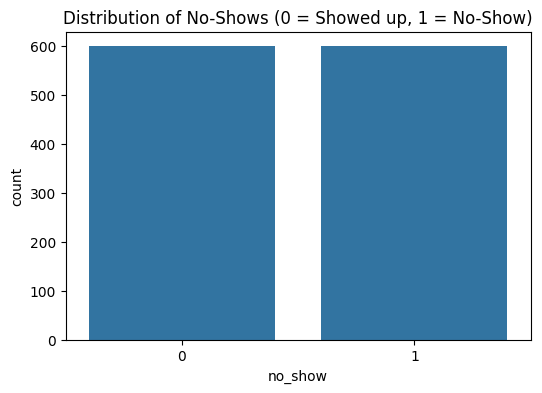

No-show rate: 50.00%


In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x="no_show", data=df)
plt.title("Distribution of No-Shows (0 = Showed up, 1 = No-Show)")
plt.show()

no_show_rate = df['no_show'].mean()
print(f"No-show rate: {no_show_rate:.2%}")

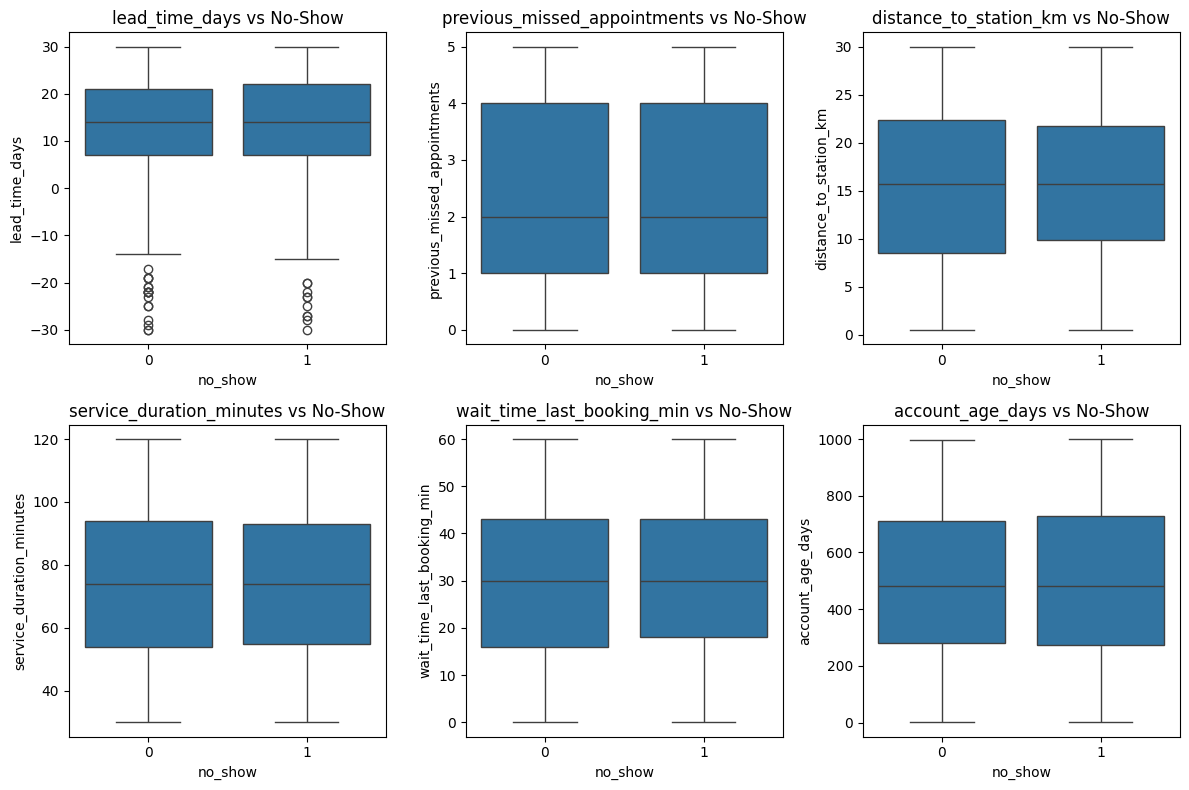

In [10]:
numerical_cols = ['lead_time_days', 'previous_missed_appointments', 'distance_to_station_km',
                  'service_duration_minutes', 'wait_time_last_booking_min', 'account_age_days']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='no_show', y=col, data=df)
    plt.title(f"{col} vs No-Show")
plt.tight_layout()
plt.show()

There was no much outliers in this dataset, the only column that had outliers is the lead_time_days

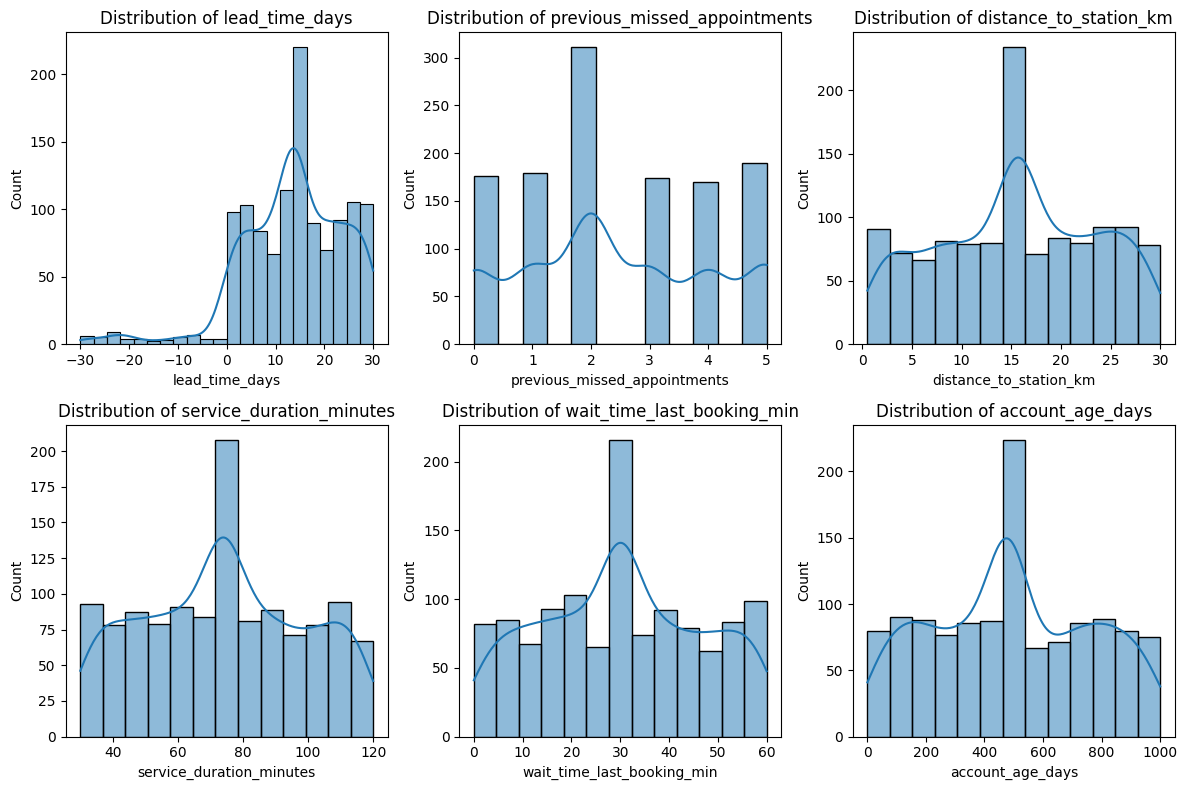

In [11]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

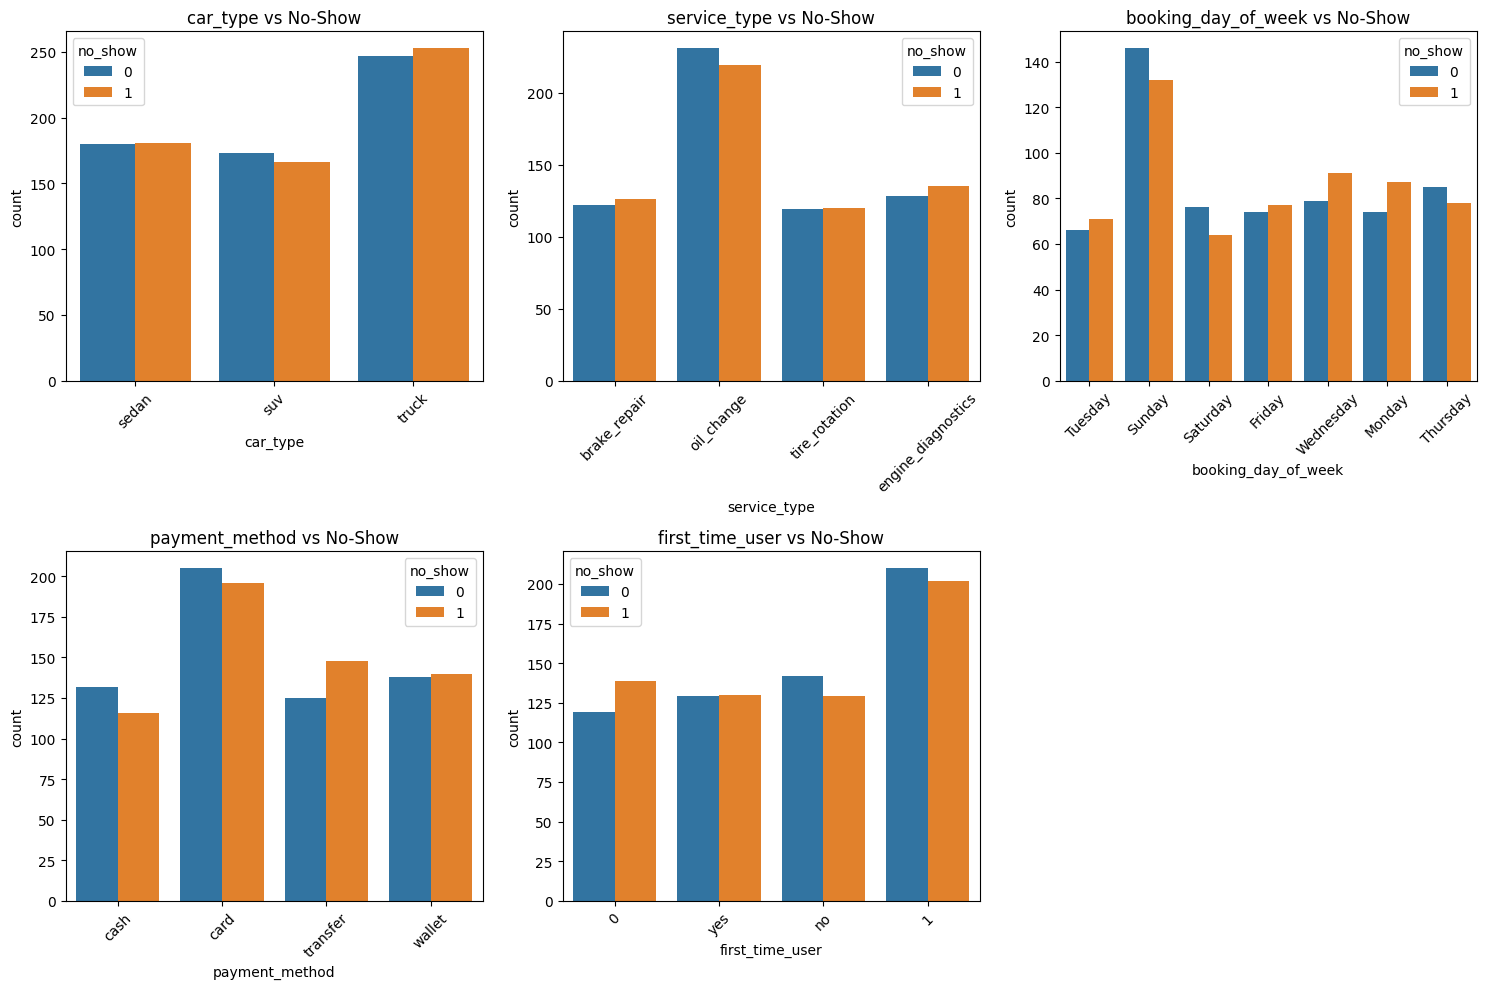

In [12]:
categorical_cols = ['car_type', 'service_type', 'booking_day_of_week', 'payment_method', 'first_time_user']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=col, hue='no_show', data=df)
  plt.title(f"{col} vs No-Show")
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

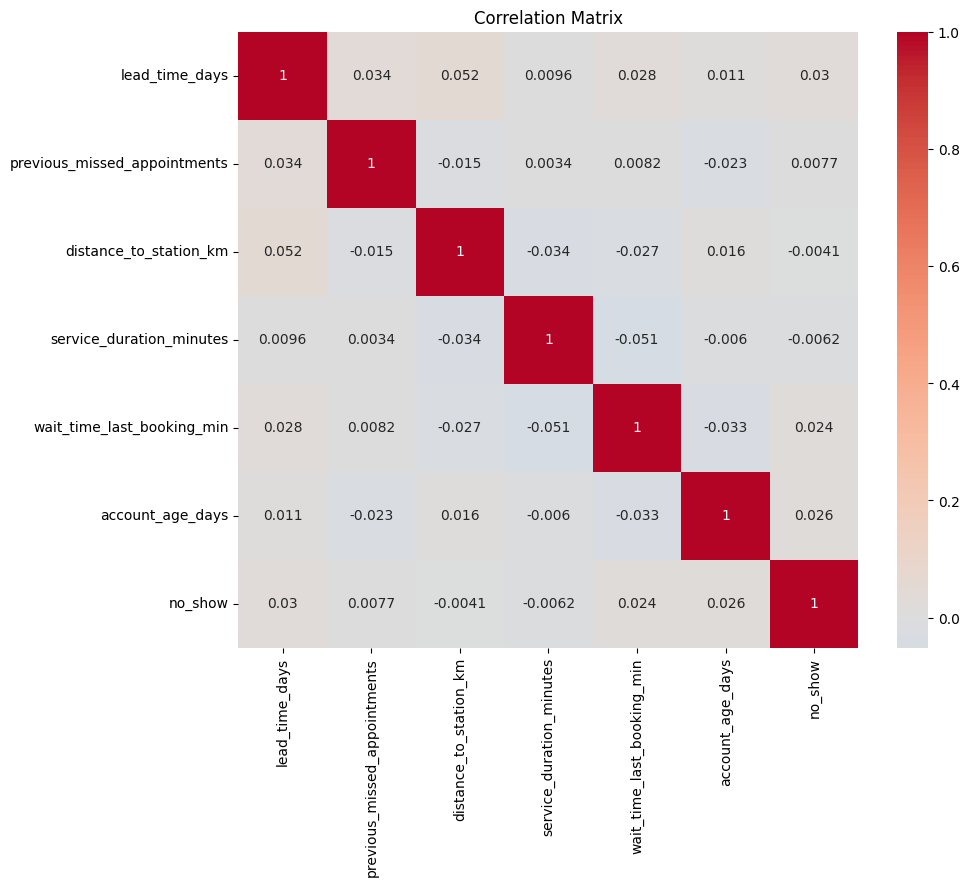

In [155]:
plt.figure(figsize=(10, 8))
corr = df[numerical_cols + ["no_show"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

The correlation of the features is really low, the features are weak and have low predictive values.

# Feature Engineering

In [116]:
# Create new features
df["is_weekend"] = df['booking_day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['lead_time_category'] = pd.cut(df['lead_time_days'],
                                  bins=[0, 1, 3, 7, 14, 30, 365],
                                  labels=['same_day', '1-3days', '4-7days', '8-14days', '15-30days', '30+days'])
df['lead_time_x_previous_missed'] = df['lead_time_days'] * df['previous_missed_appointments']
df['wait_time_ratio'] = df['wait_time_last_booking_min'] / (df['service_duration_minutes'] + 1)

# Dropping columns that are not needed
#df.drop(['user_id'], axis=1, inplace=True)

# Preprocessing & Encoding

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

In [118]:
# Define numerical and categorical features
numerical_features = ['lead_time_days', 'previous_missed_appointments', 'distance_to_station_km',
                  'service_duration_minutes', 'wait_time_last_booking_min', 'account_age_days', 'lead_time_x_previous_missed', 'wait_time_ratio']

categorical_features = ['car_type', 'service_type', 'booking_day_of_week', 'payment_method',
                        'first_time_user', 'discount_applied', 'preferred_time_slot', 'device_used',
                        'referral_source', 'booking_channel', 'lead_time_category']

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline(steps=([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the preprocessing
X = df.drop('no_show', axis=1)
y = df['no_show']

X_processed = preprocessor.fit_transform(X)

# Extract feature names
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)

# Combine all feature names
feature_names = numerical_features + list(cat_feature_names)

In [119]:
feature_names

['lead_time_days',
 'previous_missed_appointments',
 'distance_to_station_km',
 'service_duration_minutes',
 'wait_time_last_booking_min',
 'account_age_days',
 'lead_time_x_previous_missed',
 'wait_time_ratio',
 'car_type_sedan',
 'car_type_suv',
 'car_type_truck',
 'service_type_brake_repair',
 'service_type_engine_diagnostics',
 'service_type_oil_change',
 'service_type_tire_rotation',
 'booking_day_of_week_Friday',
 'booking_day_of_week_Monday',
 'booking_day_of_week_Saturday',
 'booking_day_of_week_Sunday',
 'booking_day_of_week_Thursday',
 'booking_day_of_week_Tuesday',
 'booking_day_of_week_Wednesday',
 'payment_method_card',
 'payment_method_cash',
 'payment_method_transfer',
 'payment_method_wallet',
 'first_time_user_0',
 'first_time_user_1',
 'first_time_user_no',
 'first_time_user_yes',
 'discount_applied_LOYALTY15',
 'discount_applied_NEW10',
 'discount_applied_SUMMER20',
 'preferred_time_slot_afternoon',
 'preferred_time_slot_evening',
 'preferred_time_slot_morning',
 'de

In [120]:
# Check alignment
print(f"\nProcessed data shape: {X_processed.shape}")
print(f"Number of feature names: {len(feature_names)}")
assert X_processed.shape[1] == len(feature_names), "Mismatch between features and names!"


Processed data shape: (1200, 51)
Number of feature names: 51


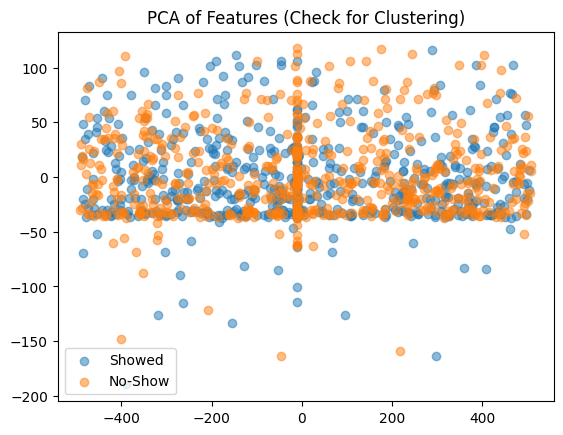

In [121]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D and plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.5, label='Showed')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.5, label='No-Show')
plt.legend()
plt.title("PCA of Features (Check for Clustering)")
plt.show()

# Feature Selection

In [149]:
# Selecting the top 15 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_processed, y)

# Get selected feature names
selected_mask = selector.get_support()
selected_features = [name for name, selected in zip(feature_names, selected_mask) if selected]

print("Top 15 selected features")
print(selected_features)

Top 15 selected features
['lead_time_days', 'lead_time_x_previous_missed', 'booking_day_of_week_Monday', 'booking_day_of_week_Saturday', 'booking_day_of_week_Wednesday', 'payment_method_cash', 'payment_method_transfer', 'first_time_user_0', 'preferred_time_slot_evening', 'preferred_time_slot_morning', 'device_used_desktop', 'device_used_mobile', 'referral_source_twitter', 'booking_channel_mobile_app', 'booking_channel_web']


# Model Training

In [151]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42, max_depth= 20, min_samples_split= 10, n_estimators= 100, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

# Model Evaluation

In [171]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="uniform")  # Random guesses
dummy.fit(X_train, y_train)
print("Random Baseline accuracy:",accuracy_score(y_test, dummy.predict(X_test)))
print("Random Baseline precision:", precision_score(y_test, dummy.predict(X_test)))
print("Random Baseline F1:", f1_score(y_test, dummy.predict(X_test)))

# Your model's performance
print("Your Model F1:", f1_score(y_test, model.predict(X_test)))

Random Baseline accuracy: 0.5361111111111111
Random Baseline precision: 0.48936170212765956
Random Baseline F1: 0.5616797900262467
Your Model F1: 0.5340599455040872



             Model Evaluation Metrics             
Accuracy:       0.5250
Precision:      0.5444
Recall:         0.5444
F1-Score:       0.5341


Classification Report:
              precision    recall  f1-score   support

   Showed-Up       0.53      0.51      0.52       180
     No-Show       0.52      0.54      0.53       180

    accuracy                           0.53       360
   macro avg       0.53      0.52      0.52       360
weighted avg       0.53      0.53      0.52       360



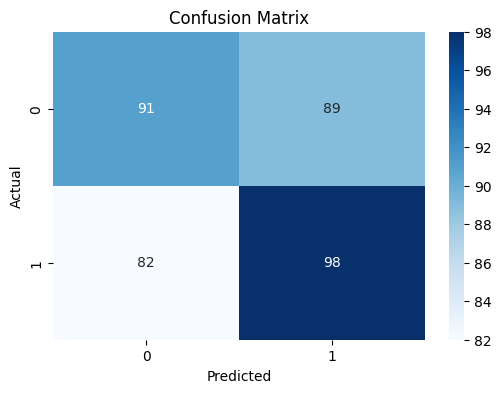

In [152]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics in a structured format
print("\n" + "="*50)
print("Model Evaluation Metrics".center(50))
print("="*50)
print(f"{'Accuracy:':<15} {accuracy:.4f}")
print(f"{'Precision:':<15} {precision:.4f}")
print(f"{'Recall:':<15} {recall:.4f}")
print(f"{'F1-Score:':<15} {f1:.4f}")
print("="*50 + "\n")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Showed-Up', "No-Show"]))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [150]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [170]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_predd = lr.predict(X_test)
# Calculate metrics
accuracyy = accuracy_score(y_predd, y_test)
precisionn = precision_score(y_predd, y_test)
recalll = recall_score(y_test, y_predd)
print(f"{'Logistic Regression Accuracy:':<15} {accuracyy:.4f}")
print(f"{'Logistic Regression Precision:':<15} {precisionn:.4f}")
print("Logistic Regression F1:", f1_score(y_test, y_predd))
# Random Forest Classifier performance
print("Random Forest Classifier F1:", f1_score(y_test, model.predict(X_test)))

Logistic Regression Accuracy: 0.5028
Logistic Regression Precision: 0.5056
Logistic Regression F1: 0.5041551246537396
Random Forest Classifier F1: 0.5340599455040872


In [169]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42, max_depth =3, scale_pos_weight=1)
xgb.fit(X_train, y_train)
y_preddd = xgb.predict(X_test)
print("XGBoost F1:", f1_score(y_test, y_preddd))
# Calculate metrics
accuracyyy = accuracy_score(y_preddd, y_test)
precisionnn = precision_score(y_preddd, y_test)
recallll = recall_score(y_test, y_preddd)
print(f"{'XGBoost Accuracy:':<15} {accuracyyy:.4f}")
print(f"{'XGBoost Precision:':<15} {precisionnn:.4f}")
# Random Forest Classifier performance
print("Random Forest Classifier F1:", f1_score(y_test, model.predict(X_test)))

XGBoost F1: 0.5179063360881543
XGBoost Accuracy: 0.5139
XGBoost Precision: 0.5222
Random Forest Classifier F1: 0.5340599455040872


                          Feature  Importance
0                  lead_time_days    0.253882
1     lead_time_x_previous_missed    0.241353
10            device_used_desktop    0.049854
13     booking_channel_mobile_app    0.048689
7               first_time_user_0    0.044594
14            booking_channel_web    0.044037
8     preferred_time_slot_evening    0.042881
11             device_used_mobile    0.040246
6         payment_method_transfer    0.039786
12        referral_source_twitter    0.038180
5             payment_method_cash    0.037096
4   booking_day_of_week_Wednesday    0.033446
9     preferred_time_slot_morning    0.032303
3    booking_day_of_week_Saturday    0.030988
2      booking_day_of_week_Monday    0.022665


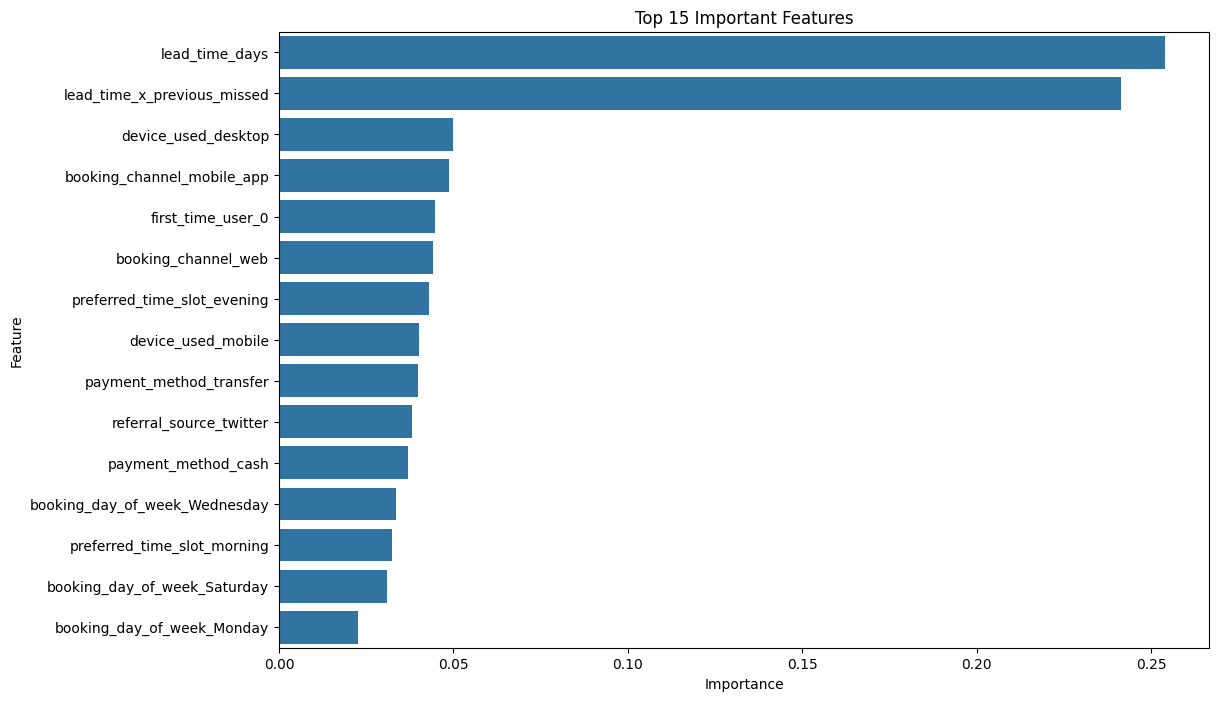

In [167]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title("Top 15 Important Features")
plt.show()